In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
sns.set_theme(style="whitegrid")

In [ ]:
try:
    df = pd.read_csv('student-mat.csv', sep=';')
    print(f"Dados carregados com sucesso: {len(df)} registros de estudantes.")
except FileNotFoundError:
    print("Erro: O arquivo 'student-mat.csv' não foi encontrado!")
    exit()

# Estatísticas descritivas para a nota final G3
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DA NOTA FINAL (G3)")
print("="*60)
print(f"Média da nota G3: {df['G3'].mean():.2f}")
print(f"Desvio padrão da nota G3: {df['G3'].std():.2f}")
print(f"Nota mínima em G3: {df['G3'].min():.2f}")
print(f"Nota máxima em G3: {df['G3'].max():.2f}")

# Categorização auxiliar (para análise descritiva apenas)
nota_limite = 14  # 70% de 20
df['acima_70_porcento_g3'] = np.where(df['G3'] >= nota_limite, 'Sim', 'Não')

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(12, 7))

# Cria o histograma das notas finais (G3)
# O argumento kde=True adiciona uma linha de estimativa de densidade
sns.histplot(data=df, x='G3', kde=True, bins=20, alpha=0.6, color='dodgerblue')
overall_mean_g3 = df['G3'].mean()
# Adiciona uma linha vertical para marcar a média de G3 (calculada na Célula 1)
# A variável 'overall_mean_g3' foi criada na célula anterior
plt.axvline(x=overall_mean_g3, color='red', linestyle='--', linewidth=2, label=f'Média de G3: {overall_mean_g3:.2f}')

# Adiciona títulos e legendas para maior clareza
plt.title('Distribuição das Notas Finais (G3) dos Alunos', fontsize=16)
plt.xlabel('Nota Final (G3)', fontsize=12)
plt.ylabel('Frequência (Nº de Alunos)', fontsize=12)
plt.legend() # Exibe a legenda

# Adiciona uma grade para facilitar a leitura (opcional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gráfico
plt.show()

In [ ]:
# Tabela descritiva: agregação por tempo de estudo
print("\n" + "="*60)
print("ANÁLISE 1: DISTRIBUIÇÃO POR TEMPO DE ESTUDO SEMANAL vs. NOTA G3")
print("="*60)

analise_tempo_estudo = df.groupby('studytime').agg(
    Total_Alunos=('G3', 'count'),
    Media_G3=('G3', 'mean'),
    Desvio_Padrao_G3=('G3', 'std'),
    Qtd_Acima_70_G3=('acima_70_porcento_g3', lambda x: (x == 'Sim').sum())
).round(2)

analise_tempo_estudo['%_Acima_70_G3'] = (
    analise_tempo_estudo['Qtd_Acima_70_G3'] / analise_tempo_estudo['Total_Alunos'] * 100
).round(1)

print(analise_tempo_estudo)

# Correlação de Spearman entre studytime e G3
print("\n" + "="*60)
print("CORRELAÇÃO DE SPEARMAN: TEMPO DE ESTUDO vs NOTA G3")
print("="*60)

spearman_corr, spearman_p = spearmanr(df['studytime'], df['G3'])
print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Valor p: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("\n✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre tempo de estudo e nota G3.")
else:
    print("\n❌ Não foi encontrada correlação monotônica significativa entre tempo de estudo e nota G3.")

# VISUALIZAÇÕES
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Desempenho dos Estudantes (G3) por Tempo de Estudo', fontsize=18, y=1.03)

studytime_labels = '1: <2h\n2: 2-5h\n3: 5-10h\n4: >10h'

# Gráfico 1: Média e desvio padrão das notas por tempo de estudo
ax1 = axes[0]
sns.barplot(
    data=df,
    x='studytime',
    y='G3',
    ax=ax1,
    errorbar='sd',
    palette='Blues',
    hue='studytime',
    legend=False
)
ax1.set_title('Média das Notas Finais (G3) por Tempo de Estudo')
ax1.set_xlabel(f'Tempo de Estudo Semanal\n({studytime_labels})')
ax1.set_ylabel('Nota Final (G3)')

# Gráfico 2: Porcentagem de alunos com G3 >= 14
ax2 = axes[1]
prop_data = df.groupby('studytime')['acima_70_porcento_g3'].apply(lambda x: (x == 'Sim').mean() * 100).fillna(0)
bars = ax2.bar(prop_data.index, prop_data.values, color='skyblue', edgecolor='navy')
ax2.set_title('Proporção de Alunos com Nota G3 ≥ 14')
ax2.set_xlabel(f'Tempo de Estudo Semanal\n({studytime_labels})')
ax2.set_ylabel('Porcentagem de Alunos (%)')
ax2.set_ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*60)
print("ANÁLISE 1: DISTRIBUIÇÃO POR Nº DE REPROVAÇÕES ANTERIORES")
print("="*60)

analise_reprovacoes = df.groupby('failures').agg(
    Total_Alunos=('G3', 'count'),
    Media_G3=('G3', 'mean'),
    Desvio_Padrao_G3=('G3', 'std'),
    Qtd_Acima_70_g3=('acima_70_porcento_g3', lambda x: (x == 'Sim').sum())
).round(2)

analise_reprovacoes['%_Acima_70_g3'] = (analise_reprovacoes['Qtd_Acima_70_g3'] / analise_reprovacoes['Total_Alunos'] * 100).round(1)
print(analise_reprovacoes)

# Correlação de Spearman
print("\n" + "="*60)
print("CORRELAÇÃO DE SPEARMAN: Nº DE REPROVAÇÕES vs NOTA G3")
print("="*60)

spearman_corr, spearman_p = spearmanr(df['failures'], df['G3'])

print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Valor p: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("\n✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre nº de reprovações e nota G3.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre nº de reprovações e nota G3.")
plt.figure(figsize=(16, 6))

# Gráfico 1: Boxplot da nota G3 por número de reprovações
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='failures', y='G3', palette='coolwarm')
plt.title('Distribuição das Notas Finais (G3) por Nº de Reprovações', fontsize=14)
plt.xlabel('Número de Reprovações Anteriores')
plt.ylabel('Nota Final (G3)')

# Gráfico 2: Média de G3 por número de reprovações
plt.subplot(1, 2, 2)
media_g3_por_reprov = df.groupby('failures')['G3'].mean()
sns.lineplot(x=media_g3_por_reprov.index, y=media_g3_por_reprov.values, marker='o', color='darkblue')
plt.title('Média da Nota Final (G3) por Nº de Reprovações', fontsize=14)
plt.xlabel('Número de Reprovações Anteriores')
plt.ylabel('Média de G3')
plt.grid(True)

plt.tight_layout()
plt.show()    


CORRELAÇÃO DE PEARSON: higher (binária) vs G3
Coeficiente de Pearson: 0.1825
Valor p: 0.0003

✅ Correlação linear estatisticamente significativa entre aspiração ao ensino superior e nota final G3.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3170927318.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='higher', y='G3', data=media_g3_por_higher, palette='magma')


Text(0, 0.5, 'Média de Nota Final (G3)')

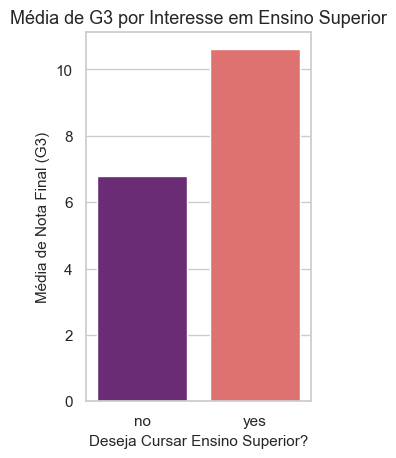

In [11]:


# Codificar higher para 0/1
df['higher_cod'] = df['higher'].map({'no': 0, 'yes': 1})

# Correlação de Pearson
print("\n" + "="*60)
print("CORRELAÇÃO DE PEARSON: higher (binária) vs G3")
print("="*60)

pearson_corr, pearson_p = pearsonr(df['higher_cod'], df['G3'])

print(f"Coeficiente de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("\n✅ Correlação linear estatisticamente significativa entre aspiração ao ensino superior e nota final G3.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre higher e G3.")

sns.set_theme(style="whitegrid")

plt.subplot(1, 2, 2)
media_g3_por_higher = df.groupby('higher')['G3'].mean().reset_index()
sns.barplot(x='higher', y='G3', data=media_g3_por_higher, palette='magma')
plt.title('Média de G3 por Interesse em Ensino Superior', fontsize=13)
plt.xlabel('Deseja Cursar Ensino Superior?', fontsize=11)
plt.ylabel('Média de Nota Final (G3)', fontsize=11)

CORRELAÇÃO DE PEARSON: FALTAS vs NOTA FINAL (G3)
Coeficiente de Pearson: 0.0342
Valor p: 0.4973

❌ Não há correlação linear significativa entre faltas e G3.


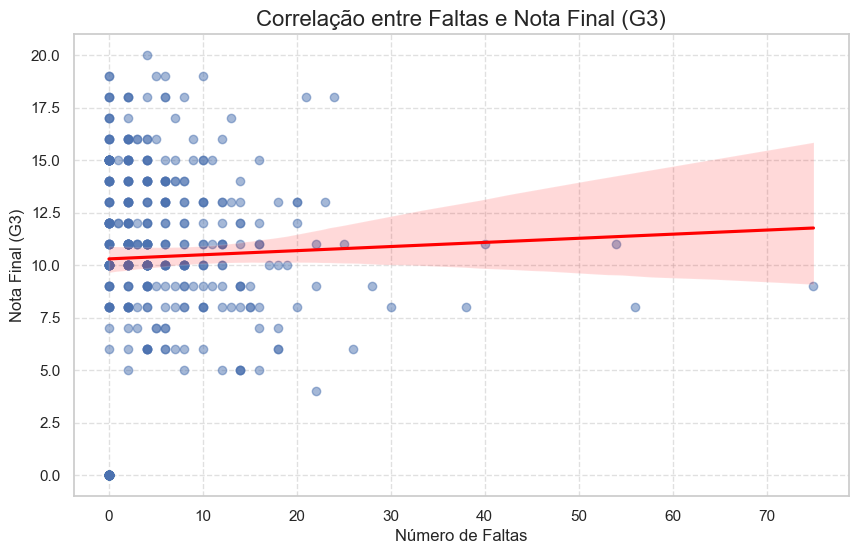

In [14]:
# Correlação de Pearson entre faltas e nota final
pearson_corr, pearson_p = pearsonr(df['absences'], df['G3'])

print("CORRELAÇÃO DE PEARSON: FALTAS vs NOTA FINAL (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("\n✅ Existe uma correlação linear estatisticamente significativa entre faltas e G3.")
else:
    print("\n❌ Não há correlação linear significativa entre faltas e G3.")

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='absences', y='G3', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Correlação entre Faltas e Nota Final (G3)', fontsize=16)
plt.xlabel('Número de Faltas', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
